In [ ]:
pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 1.9 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.6-py3-none-any.whl size=62946 sha256=939302a2882e85a05aace3c21cbd2dce55b8319d9c605dc96423583eb0667b29
  Stored in directory: /root/.cache/pip/wheels/ff/fc/ed/09e6cb7c61780f5462f1dfd1df7d1fabef0123ced961ac0738
Successfully built mplsoccer


In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib as mpl

In [ ]:
from mplsoccer import Pitch, VerticalPitch

In [ ]:
#Scraping All of Mount's shots:
base_url = 'https://understat.com/player/'
player = str(input('Please enter the player id: '))
url = base_url+player

Please enter the player id: 7768


In [ ]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [ ]:
#Getting the shot data:
strings = scripts[3].string

In [ ]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

data[:5]

[{'X': '0.7390000152587891',
  'Y': '0.44299999237060544',
  'a_goals': '0',
  'a_team': 'Chelsea',
  'date': '2019-08-11 16:30:00',
  'h_a': 'a',
  'h_goals': '4',
  'h_team': 'Manchester United',
  'id': '310296',
  'lastAction': 'Pass',
  'match_id': '11652',
  'minute': '11',
  'player': 'Mason Mount',
  'player_assisted': 'Pedro',
  'player_id': '7768',
  'result': 'SavedShot',
  'season': '2019',
  'shotType': 'RightFoot',
  'situation': 'OpenPlay',
  'xG': '0.021734273061156273'},
 {'X': '0.7819999694824219',
  'Y': '0.6480000305175782',
  'a_goals': '0',
  'a_team': 'Chelsea',
  'date': '2019-08-11 16:30:00',
  'h_a': 'a',
  'h_goals': '4',
  'h_team': 'Manchester United',
  'id': '310317',
  'lastAction': 'Pass',
  'match_id': '11652',
  'minute': '84',
  'player': 'Mason Mount',
  'player_assisted': 'Pedro',
  'player_id': '7768',
  'result': 'SavedShot',
  'season': '2019',
  'shotType': 'RightFoot',
  'situation': 'OpenPlay',
  'xG': '0.02486059069633484'},
 {'X': '0.861999

In [ ]:
df = pd.DataFrame(data)

df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,310296,11,SavedShot,0.7390000152587891,0.44299999237060544,0.021734273061156273,Mason Mount,a,7768,OpenPlay,2019,RightFoot,11652,Manchester United,Chelsea,4,0,2019-08-11 16:30:00,Pedro,Pass
1,310317,84,SavedShot,0.7819999694824219,0.6480000305175782,0.02486059069633484,Mason Mount,a,7768,OpenPlay,2019,RightFoot,11652,Manchester United,Chelsea,4,0,2019-08-11 16:30:00,Pedro,Pass
2,311166,1,SavedShot,0.8619999694824219,0.41200000762939454,0.07666550576686859,Mason Mount,h,7768,OpenPlay,2019,LeftFoot,11661,Chelsea,Leicester,1,1,2019-08-18 16:30:00,Olivier Giroud,BallTouch
3,311167,6,Goal,0.8619999694824219,0.47,0.0780671089887619,Mason Mount,h,7768,OpenPlay,2019,RightFoot,11661,Chelsea,Leicester,1,1,2019-08-18 16:30:00,None,None
4,311169,20,SavedShot,0.895,0.5029999923706054,0.09247975796461105,Mason Mount,h,7768,OpenPlay,2019,Head,11661,Chelsea,Leicester,1,1,2019-08-18 16:30:00,César Azpilicueta,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,477805,8,MissedShots,0.88,0.49900001525878906,0.10113448649644852,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Saúl Ñíguez,Rebound
232,477809,20,MissedShots,0.9590000152587891,0.5979999923706054,0.2305414378643036,Mason Mount,h,7768,OpenPlay,2021,Head,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Hakim Ziyech,Cross
233,477813,38,SavedShot,0.899000015258789,0.3060000038146973,0.06563196331262589,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,None,None
234,477815,43,BlockedShot,0.8640000152587891,0.4370000076293945,0.10932747274637222,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Reece James,Pass


In [ ]:
filt = ((df['h_team'] == 'Chelsea') | (df['a_team'] == 'Chelsea')) 

df1 = df[filt]

df1

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,310296,11,SavedShot,0.7390000152587891,0.44299999237060544,0.021734273061156273,Mason Mount,a,7768,OpenPlay,2019,RightFoot,11652,Manchester United,Chelsea,4,0,2019-08-11 16:30:00,Pedro,Pass
1,310317,84,SavedShot,0.7819999694824219,0.6480000305175782,0.02486059069633484,Mason Mount,a,7768,OpenPlay,2019,RightFoot,11652,Manchester United,Chelsea,4,0,2019-08-11 16:30:00,Pedro,Pass
2,311166,1,SavedShot,0.8619999694824219,0.41200000762939454,0.07666550576686859,Mason Mount,h,7768,OpenPlay,2019,LeftFoot,11661,Chelsea,Leicester,1,1,2019-08-18 16:30:00,Olivier Giroud,BallTouch
3,311167,6,Goal,0.8619999694824219,0.47,0.0780671089887619,Mason Mount,h,7768,OpenPlay,2019,RightFoot,11661,Chelsea,Leicester,1,1,2019-08-18 16:30:00,None,None
4,311169,20,SavedShot,0.895,0.5029999923706054,0.09247975796461105,Mason Mount,h,7768,OpenPlay,2019,Head,11661,Chelsea,Leicester,1,1,2019-08-18 16:30:00,César Azpilicueta,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,477805,8,MissedShots,0.88,0.49900001525878906,0.10113448649644852,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Saúl Ñíguez,Rebound
232,477809,20,MissedShots,0.9590000152587891,0.5979999923706054,0.2305414378643036,Mason Mount,h,7768,OpenPlay,2021,Head,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Hakim Ziyech,Cross
233,477813,38,SavedShot,0.899000015258789,0.3060000038146973,0.06563196331262589,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,None,None
234,477815,43,BlockedShot,0.8640000152587891,0.4370000076293945,0.10932747274637222,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Reece James,Pass


In [ ]:
filt2 = (df['season'] == '2021')

In [ ]:
df2 = df1[filt2]

df2

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
160,425826,14,SavedShot,0.8480000305175781,0.825999984741211,0.047117963433265686,Mason Mount,h,7768,DirectFreekick,2021,RightFoot,16379,Chelsea,Crystal Palace,3,0,2021-08-14 14:00:00,None,Standard
161,425829,33,BlockedShot,0.764000015258789,0.5779999923706055,0.07115417718887329,Mason Mount,h,7768,DirectFreekick,2021,RightFoot,16379,Chelsea,Crystal Palace,3,0,2021-08-14 14:00:00,None,Standard
162,425838,67,BlockedShot,0.7709999847412109,0.6509999847412109,0.028487274423241615,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16379,Chelsea,Crystal Palace,3,0,2021-08-14 14:00:00,Mateo Kovacic,Pass
163,427761,22,BlockedShot,0.865,0.42700000762939455,0.1115119606256485,Mason Mount,a,7768,OpenPlay,2021,RightFoot,16394,Arsenal,Chelsea,0,2,2021-08-22 15:30:00,Reece James,Pass
164,427765,30,SavedShot,0.865999984741211,0.8180000305175781,0.01687496341764927,Mason Mount,a,7768,OpenPlay,2021,RightFoot,16394,Arsenal,Chelsea,0,2,2021-08-22 15:30:00,Reece James,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,477805,8,MissedShots,0.88,0.49900001525878906,0.10113448649644852,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Saúl Ñíguez,Rebound
232,477809,20,MissedShots,0.9590000152587891,0.5979999923706054,0.2305414378643036,Mason Mount,h,7768,OpenPlay,2021,Head,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Hakim Ziyech,Cross
233,477813,38,SavedShot,0.899000015258789,0.3060000038146973,0.06563196331262589,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,None,None
234,477815,43,BlockedShot,0.8640000152587891,0.4370000076293945,0.10932747274637222,Mason Mount,h,7768,OpenPlay,2021,RightFoot,16750,Chelsea,Watford,2,1,2022-05-22 15:00:00,Reece James,Pass


In [ ]:
shots = df2[['X', 'Y', 'xG' , 'result', 'player', 'situation', 'season', 'shotType', 'player']]

shots

,X,Y,xG,result,player,situation,season,shotType,player
160,0.8480000305175781,0.825999984741211,0.047117963433265686,SavedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount
161,0.764000015258789,0.5779999923706055,0.07115417718887329,BlockedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount
162,0.7709999847412109,0.6509999847412109,0.028487274423241615,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount
163,0.865,0.42700000762939455,0.1115119606256485,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount
164,0.865999984741211,0.8180000305175781,0.01687496341764927,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount
...,...,...,...,...,...,...,...,...,...
231,0.88,0.49900001525878906,0.10113448649644852,MissedShots,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount
232,0.9590000152587891,0.5979999923706054,0.2305414378643036,MissedShots,Mason Mount,OpenPlay,2021,Head,Mason Mount
233,0.899000015258789,0.3060000038146973,0.06563196331262589,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount
234,0.8640000152587891,0.4370000076293945,0.10932747274637222,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount


In [ ]:
shots['X'] = pd.to_numeric(shots['X'])
shots['Y'] = pd.to_numeric(shots['Y'])
shots['xG'] = pd.to_numeric(shots['xG'])

shots['X'] = shots['X']* 100
shots['Y'] = shots['Y']* 100

shots['xx'] = shots['Y']
shots['yy'] = shots['X']

shots['X'] = shots['xx']
shots['Y'] = shots['yy']

shots['X'] = shots['X']*.8
shots['Y'] = shots['Y']*1.2

shots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
160,66.079999,101.760004,0.047118,SavedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount,82.599998,84.800003
161,46.239999,91.680002,0.071154,BlockedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount,57.799999,76.400002
162,52.079999,92.519998,0.028487,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,65.099998,77.099998
163,34.160001,103.800000,0.111512,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,42.700001,86.500000
164,65.440002,103.919998,0.016875,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,81.800003,86.599998
...,...,...,...,...,...,...,...,...,...,...,...
231,39.920001,105.600000,0.101134,MissedShots,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,49.900002,88.000000
232,47.839999,115.080002,0.230541,MissedShots,Mason Mount,OpenPlay,2021,Head,Mason Mount,59.799999,95.900002
233,24.480000,107.880002,0.065632,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,30.600000,89.900002
234,34.960001,103.680002,0.109327,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,43.700001,86.400002


In [ ]:
filt6 = shots['situation'] == 'Penalty'


In [ ]:
filt_pen = shots['situation'] != 'Penalty'

shots = shots[filt_pen]

shots

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
160,66.079999,101.760004,0.047118,SavedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount,82.599998,84.800003
161,46.239999,91.680002,0.071154,BlockedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount,57.799999,76.400002
162,52.079999,92.519998,0.028487,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,65.099998,77.099998
163,34.160001,103.800000,0.111512,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,42.700001,86.500000
164,65.440002,103.919998,0.016875,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,81.800003,86.599998
...,...,...,...,...,...,...,...,...,...,...,...
231,39.920001,105.600000,0.101134,MissedShots,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,49.900002,88.000000
232,47.839999,115.080002,0.230541,MissedShots,Mason Mount,OpenPlay,2021,Head,Mason Mount,59.799999,95.900002
233,24.480000,107.880002,0.065632,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,30.600000,89.900002
234,34.960001,103.680002,0.109327,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,43.700001,86.400002


In [ ]:
filt3 = shots['result'] == 'Goal'

goal = shots[filt3]

goal.head()

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
170,37.920001,96.360004,0.054601,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,47.400002,80.300003
174,38.000000,109.080002,0.551780,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,47.500000,90.900002
177,36.560001,108.600000,0.444311,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,45.700001,90.500000
179,26.160001,108.000000,0.054218,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,32.700001,90.000000
182,46.960001,110.519998,0.327648,Goal,Mason Mount,OpenPlay,2021,LeftFoot,Mason Mount,58.700001,92.099998


In [ ]:
goal

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
170,37.920001,96.360004,0.054601,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,47.400002,80.300003
174,38.000000,109.080002,0.551780,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,47.500000,90.900002
177,36.560001,108.600000,0.444311,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,45.700001,90.500000
179,26.160001,108.000000,0.054218,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,32.700001,90.000000
182,46.960001,110.519998,0.327648,Goal,Mason Mount,OpenPlay,2021,LeftFoot,Mason Mount,58.700001,92.099998
188,28.720001,113.519998,0.288688,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,35.900002,94.599998
203,36.560001,103.439996,0.110724,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,45.700001,86.199997
211,34.000000,92.880002,0.041006,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,42.500000,77.400002
213,38.720001,114.839996,0.746338,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,48.400002,95.699997
226,28.960001,102.000000,0.051133,Goal,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,36.200001,85.000000


In [ ]:
filt4 = shots['result'] != 'Goal'

others = shots[filt4]

others

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
160,66.079999,101.760004,0.047118,SavedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount,82.599998,84.800003
161,46.239999,91.680002,0.071154,BlockedShot,Mason Mount,DirectFreekick,2021,RightFoot,Mason Mount,57.799999,76.400002
162,52.079999,92.519998,0.028487,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,65.099998,77.099998
163,34.160001,103.800000,0.111512,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,42.700001,86.500000
164,65.440002,103.919998,0.016875,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,81.800003,86.599998
...,...,...,...,...,...,...,...,...,...,...,...
231,39.920001,105.600000,0.101134,MissedShots,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,49.900002,88.000000
232,47.839999,115.080002,0.230541,MissedShots,Mason Mount,OpenPlay,2021,Head,Mason Mount,59.799999,95.900002
233,24.480000,107.880002,0.065632,SavedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,30.600000,89.900002
234,34.960001,103.680002,0.109327,BlockedShot,Mason Mount,OpenPlay,2021,RightFoot,Mason Mount,43.700001,86.400002


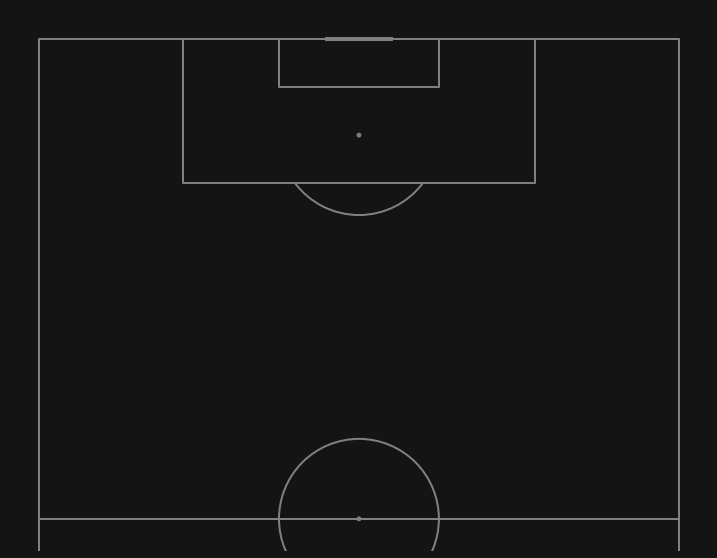

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)

# pitch = Pitch(pitch_type='statsbomb', orientation='vertical', view = 'half',
#               pitch_color=bg, line_color='grey', figsize=(16, 10),
#               constrained_layout=False, tight_layout=True)

pitch = VerticalPitch(half=True, pitch_type = 'statsbomb', 
                      pitch_color=bg, line_color='grey', figsize=(16, 10),
                      constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_xaxis()

size = np.sqrt(goal['xG'])*500
size1 = np.sqrt(others['xG'])*500

In [ ]:
ax.scatter(goal['X'], goal['Y'], s=size, alpha=0.7, color='blue', edgecolor='blue', zorder=4, lw=2.2)
ax.scatter(others['X'], others['Y'], s=size1, alpha=0.45, color='grey', edgecolor='grey', zorder=3, lw=1.25)

ax.scatter(70,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(55,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(25,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(10,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)

t1 = ax.text(70,66.5,'10',size=35, ha='center', color='blue',fontweight='bold', fontfamily=body_font, zorder=4)
t2 = ax.text(70,60,"nP Goals", size=22, ha='center', color='blue', fontweight='bold', fontfamily=body_font, zorder=4)

t3= ax.text(55,67,"8.52", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t4 = ax.text(55,60,"xG", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t5= ax.text(25,67,"76", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t6 = ax.text(25,60, "Shots", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t7 = ax.text(10,67, "0.11", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t8 = ax.text(10,60, "xG/Shot", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

In [ ]:
t = ax.text(40,126, "Mason Mount", size=36, ha='center', color='white', fontweight='bold',fontfamily=title_font, zorder=4)
t= ax.text(40,122.7, "Premier League | Season 2021-2022 | Shot Map", size=21, ha='center', color='white',fontfamily=body_font, zorder=4)

t9 = ax.text(70,54.5, "@thefulltimewhistleco", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t10 = ax.text(8,56.5, "Data: understat", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t11 = ax.text(8,54, "Size represents xG value", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


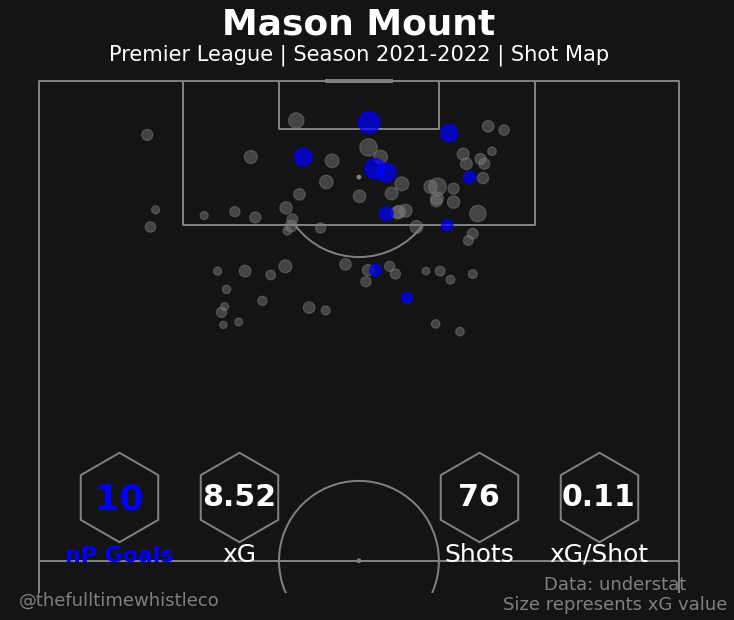

In [ ]:
fig